# With CNN

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Path ke folder dataset
dataset_dir = '/content/drive/MyDrive/PROJECT/WORKSHOP ITTODAY IPB/buah'

# Pra-pemrosesan gambar
image_size = (224, 224)  # Ubah sesuai kebutuhan Anda
batch_size = 256

# Pembagian data train dan test
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

test_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 3383 images belonging to 10 classes.
Found 841 images belonging to 10 classes.


In [3]:
class_names = train_generator.class_indices
print(class_names)

{'FreshApple': 0, 'FreshBanana': 1, 'FreshMango': 2, 'FreshOrange': 3, 'FreshStrawberry': 4, 'RottenApple': 5, 'RottenBanana': 6, 'RottenMango': 7, 'RottenOrange': 8, 'RottenStrawberry': 9}


In [9]:
# Membangun model CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

# Melatih model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs = 10
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.1992 - loss: 7.8694 - val_accuracy: 0.3567 - val_loss: 2.0916
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.4936 - loss: 1.4287 - val_accuracy: 0.4804 - val_loss: 1.7639
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.6775 - loss: 0.9282 - val_accuracy: 0.5648 - val_loss: 1.7259
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8090 - loss: 0.6120 - val_accuracy: 0.6421 - val_loss: 1.5856
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.8934 - loss: 0.3680 - val_accuracy: 0.6659 - val_loss: 1.6104
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.9209 - loss: 0.2773 - val_accuracy: 0.6576 - val_loss: 1.7242
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9581 - loss: 0.1562 - val_accuracy: 0.6790 - val_loss: 1.8987
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9722 - loss: 0.1166 - val_accuracy: 0.6968 - val_loss:

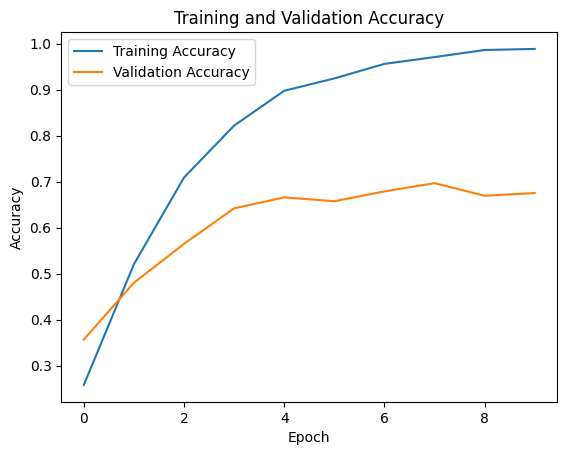

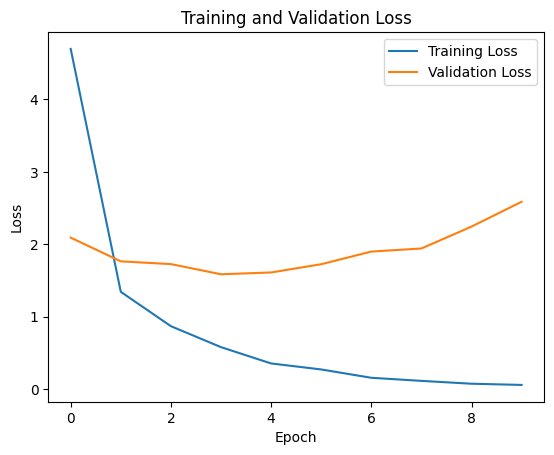

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6646 - loss: 2.6367
Test Loss: 2.5861101150512695, Test Accuracy: 0.6753864288330078


In [10]:
# Visualisasi akurasi dan loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi model pada subset test
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

In [11]:
# Prediksi menggunakan model untuk satu gambar
sample_image_path = '/content/drive/MyDrive/PROJECT/WORKSHOP ITTODAY IPB/buah/FreshApple/freshApple (1).jpg'  # Ganti dengan path gambar yang ingin diprediksi
sample_image = tf.keras.preprocessing.image.load_img(sample_image_path, target_size=image_size)
sample_image_array = tf.keras.preprocessing.image.img_to_array(sample_image)
sample_image_array = np.expand_dims(sample_image_array, axis=0)
sample_image_array = sample_image_array / 255.0  # Normalisasi

predictions = model.predict(sample_image_array)
class_index = np.argmax(predictions[0])
class_name = train_generator.class_indices
for key, value in class_name.items():
    if value == class_index:
        class_name = key

print(f'Predicted class: {class_name}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Predicted class: FreshApple


In [12]:
# Prediksi menggunakan model untuk satu gambar
sample_image_path = '/content/drive/MyDrive/PROJECT/WORKSHOP ITTODAY IPB/Apel.jpg'  # Ganti dengan path gambar yang ingin diprediksi
sample_image = tf.keras.preprocessing.image.load_img(sample_image_path, target_size=image_size)
sample_image_array = tf.keras.preprocessing.image.img_to_array(sample_image)
sample_image_array = np.expand_dims(sample_image_array, axis=0)
sample_image_array = sample_image_array / 255.0  # Normalisasi

predictions = model.predict(sample_image_array)
class_index = np.argmax(predictions[0])
class_name = train_generator.class_indices
for key, value in class_name.items():
    if value == class_index:
        class_name = key

print(f'Predicted class: {class_name}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: FreshStrawberry
